# analysis

----------------------

In [13]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
train_raw = pd.read_csv('../../data/raw/train_data.csv.zip')
test_raw = pd.read_csv('../../data/raw/test_data.csv.zip')

### Inspect

In [3]:
print(train_raw.shape)
print(test_raw.shape)

(375734, 246)
(31354, 245)


In [4]:
# target column
for x in train_raw.columns.values:
    if x not in test_raw.columns.values:
        print(x)

contest-tmp2m-14d__tmp2m


In [5]:
train_raw['contest-tmp2m-14d__tmp2m'].describe()


count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

In [6]:
train_raw.head( )

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [7]:
x = '9/1/14'

day, month, year = map(int, x.split('/'))
y = year*10000 + month * 100 + day
print(year, month, day)


print(y)

14 1 9
140109


In [8]:
X = train_raw.copy()
X.startdate = pd.to_datetime(X.startdate)
print(X.startdate[:5])

for x in X.startdate[:5]:
    print(time.mktime(x.timetuple()))



0   2014-09-01
1   2014-09-02
2   2014-09-03
3   2014-09-04
4   2014-09-05
Name: startdate, dtype: datetime64[ns]
1409522400.0
1409608800.0
1409695200.0
1409781600.0
1409868000.0


In [9]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375734 entries, 0 to 375733
Columns: 246 entries, index to wind-vwnd-925-2010-20
dtypes: float64(240), int64(4), object(2)
memory usage: 705.2+ MB


In [10]:
train_raw['contest-tmp2m-14d__tmp2m'].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

In [11]:
for col in train_raw.columns:
    print(col, train_raw[col].nunique(), train_raw[col].dtype)

index 375734 int64
lat 23 float64
lon 31 float64
startdate 731 object
contest-pevpr-sfc-gauss-14d__pevpr 74166 float64
nmme0-tmp2m-34w__cancm30 4029 float64
nmme0-tmp2m-34w__cancm40 4046 float64
nmme0-tmp2m-34w__ccsm30 3840 float64
nmme0-tmp2m-34w__ccsm40 3983 float64
nmme0-tmp2m-34w__cfsv20 3667 float64
nmme0-tmp2m-34w__gfdlflora0 4069 float64
nmme0-tmp2m-34w__gfdlflorb0 4067 float64
nmme0-tmp2m-34w__gfdl0 3987 float64
nmme0-tmp2m-34w__nasa0 4221 float64
nmme0-tmp2m-34w__nmme0mean 3931 float64
contest-wind-h10-14d__wind-hgt-10 124346 float64
nmme-tmp2m-56w__cancm3 4871 float64
nmme-tmp2m-56w__cancm4 4910 float64
nmme-tmp2m-56w__ccsm3 5000 float64
nmme-tmp2m-56w__ccsm4 4738 float64
nmme-tmp2m-56w__cfsv2 4547 float64
nmme-tmp2m-56w__gfdl 4657 float64
nmme-tmp2m-56w__gfdlflora 4882 float64
nmme-tmp2m-56w__gfdlflorb 4815 float64
nmme-tmp2m-56w__nasa 5766 float64
nmme-tmp2m-56w__nmmemean 4721 float64
contest-rhum-sig995-14d__rhum 8185 float64
nmme-prate-34w__cancm3 10138 float64
nmme-prate

In [84]:
X = train_raw.copy()
dates = pd.DataFrame([ds.split('/') for ds in X.startdate], columns=['month', 'day', 'year'])
dates['date'] = pd.to_datetime(X.startdate)
dates['rng_month'] = [((int(y) - 14) * 12 + int(m)) - 9 for m, y in zip(dates.month, dates.year)]
dates['rng_week'] = [int(round((((int(y) - 14) * 364 + int(m) * 30 + int(d)) - 9 * 30)/7, 0)) for d, m, y in zip(dates.day, dates.month, dates.year)]
print(f'Timeframe (Y-M-D): \n   from {dates.date.min()}  until  {dates.date.max()}')
print(f'Count of running month & week: \n   m:{dates.rng_month.max()} & w:{dates.rng_week.max()}')
dates.head(3)

Timeframe (Y-M-D): 
   from 2014-09-01 00:00:00  until  2016-08-31 00:00:00
Count of running month & week: 
   m:23 & w:104


,month,day,year,date,rng_month,rng_week
0,9,1,14,2014-09-01,0,0
1,9,2,14,2014-09-02,0,0
2,9,3,14,2014-09-03,0,0


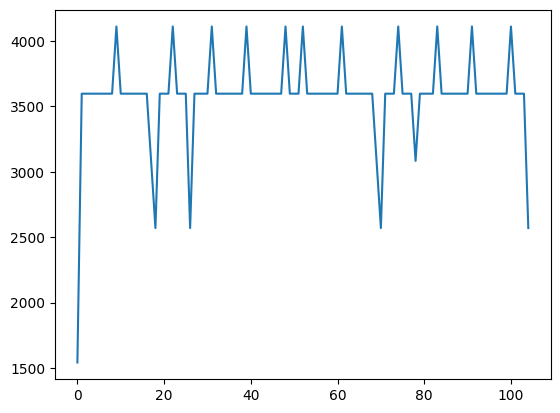

In [109]:
# checking occurencies of weeks during the 2 year time period
weeks = dates.groupby('rng_week')['month'].count().reset_index().rename(columns={'month': 'num'})
plt.plot(weeks.num)

In [114]:
cov = np.cov(X.select_dtypes(exclude=['object']).T)
eig_val, eig_vec = np.linalg.eig(cov)
print('Eigenvalues = ', eig_val)
print('Eigenvectors = ', eig_vec)

LinAlgError: Array must not contain infs or NaNs